# Predictions & simulations - Project 1
## Report created by Artem Beregovskykh, Joanna Mateuszczyk, Juliusz Pronobis-Szczylik, Wenjiao Zhou


### Importing libraries

In [39]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats

import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
%matplotlib inline

### Importing data
*Place for explanation if needed*

In [40]:
df1 = pd.read_csv('C:/Users/asia/Downloads/Predictions&simulations II/Spain stock index(^IBEX)_EUR.csv', parse_dates=['Date'])

In [41]:
df1

,Date,IBEX
0,2000-01-01,11641.400390
1,2000-02-01,10840.000000
2,2000-03-01,12585.799810
3,2000-04-01,11935.000000
4,2000-05-01,11569.200200
...,...,...
276,2023-01-01,8297.900391
277,2023-02-01,9048.000000
278,2023-03-01,9419.299805
279,2023-04-01,9217.799805


In [42]:
# Check the data type of the 'Date' column
print(df1.dtypes)

Date    datetime64[ns]
IBEX           float64
dtype: object


### Plotting
*Place for explaining steps*

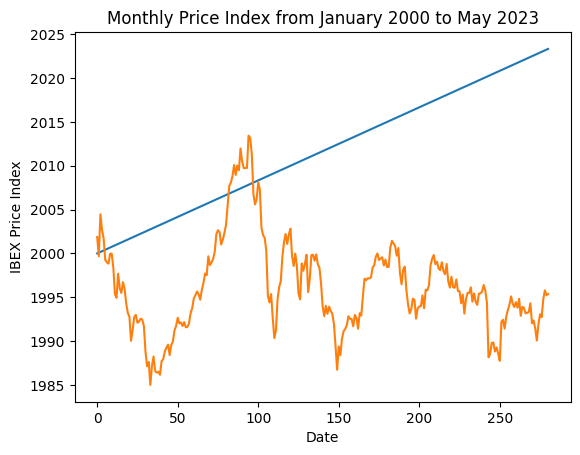

In [43]:
plt.plot(df1)
plt.xlabel('Date')
plt.ylabel('IBEX Price Index')
plt.title('Monthly Price Index from January 2000 to May 2023')
plt.show()

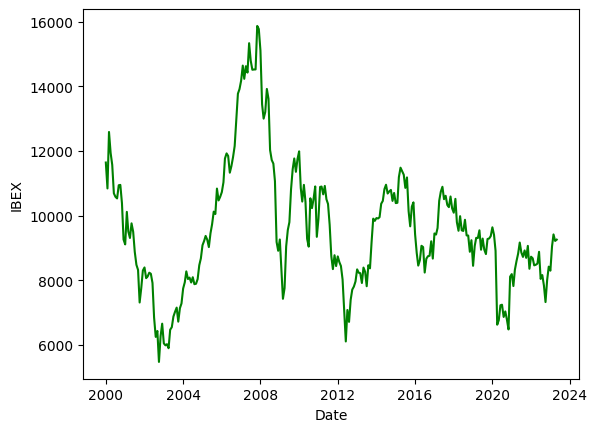

In [44]:
sns.lineplot(x="Date", y="IBEX", data=df1, color='green')
plt.show()

### Stationary tests
*Place for explaining steps*

In [46]:
# Perform the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(df['IBEX'])
print('ADF Statistic: ', adf_result[0])
print('p-value: ', adf_result[1])
print('Critical Values: ', adf_result[4])


ADF Statistic:  -2.5727847848258962
p-value:  0.09875355884152848
Critical Values:  {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}


In [47]:
# Perform the Phillips-Perron (PP) test
pp_result = kpss(df['IBEX'])
print('PP Statistic: ', pp_result[0])
print('p-value: ', pp_result[1])
print('Critical Values: ', pp_result[3])

PP Statistic:  0.22753379246068223
p-value:  0.1
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\Users\asia\anaconda3\envs\snowflake\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


### Transformations and new tests - if needed
*Place for explaining steps*

*Place for some ending comments*